# Importando as Bibliotecas

In [285]:
!pip install xgboost

In [286]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# **Parte 1 - Entendimento e Exploração dos Dados (EDA)**

In [287]:
# Leitura do dataset
df = pd.read_csv('/content/edtech_dropout_dataset.csv')

# Mostrar primeiras linhas
df.head()

,student_id,age,gender,education_level,course_category,days_active_first_week,avg_minutes_per_session,total_sessions,completed_first_quiz,forum_posts,messages_to_tutor,subscription_type,device_type,dropout_within_30_days
0,S0000,54,Female,Graduate,Design,6,49.66,27,0,1,0,Free,Tablet,0
1,S0001,44,Female,NaN,Tech,5,2.07,23,0,1,0,Paid,Tablet,1
2,S0002,30,Male,Graduate,Languages,0,19.45,27,0,0,0,Free,Tablet,1
3,S0003,58,Other,Graduate,Business,2,58.91,5,1,1,1,Free,Tablet,0
4,S0004,23,Male,Graduate,Business,0,29.54,25,1,1,0,Paid,Desktop,0


In [288]:
# Informações gerais sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   student_id               500 non-null    object 
 1   age                      500 non-null    int64  
 2   gender                   500 non-null    object 
 3   education_level          393 non-null    object 
 4   course_category          500 non-null    object 
 5   days_active_first_week   500 non-null    int64  
 6   avg_minutes_per_session  500 non-null    float64
 7   total_sessions           500 non-null    int64  
 8   completed_first_quiz     500 non-null    int64  
 9   forum_posts              500 non-null    int64  
 10  messages_to_tutor        500 non-null    int64  
 11  subscription_type        500 non-null    object 
 12  device_type              500 non-null    object 
 13  dropout_within_30_days   500 non-null    int64  
dtypes: float64(1), int64(7), o

In [289]:
# Estatísticas descritivas para variáveis numéricas e categóricas
df.describe(include='all')

,student_id,age,gender,education_level,course_category,days_active_first_week,avg_minutes_per_session,total_sessions,completed_first_quiz,forum_posts,messages_to_tutor,subscription_type,device_type,dropout_within_30_days
count,500,500.000000,500,393,500,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500,500,500.000000
unique,500,NaN,3,3,4,NaN,NaN,NaN,NaN,NaN,NaN,2,3,NaN
top,S0499,NaN,Female,High School,Languages,NaN,NaN,NaN,NaN,NaN,NaN,Free,Tablet,NaN
freq,1,NaN,245,136,133,NaN,NaN,NaN,NaN,NaN,NaN,351,172,NaN
mean,NaN,38.116000,NaN,NaN,NaN,3.386000,30.348080,15.170000,0.392000,1.208000,0.468000,NaN,NaN,0.158000
std,NaN,12.733217,NaN,NaN,NaN,2.278461,16.794079,8.581164,0.488686,1.114999,0.676677,NaN,NaN,0.365106
min,NaN,16.000000,NaN,NaN,NaN,0.000000,2.020000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
25%,NaN,27.000000,NaN,NaN,NaN,1.000000,15.182500,8.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
50%,NaN,39.000000,NaN,NaN,NaN,3.000000,30.275000,15.000000,0.000000,1.000000,0.000000,NaN,NaN,0.000000
75%,NaN,48.000000,NaN,NaN,NaN,5.000000,45.295000,23.000000,1.000000,2.000000,1.000000,NaN,NaN,0.000000


In [290]:
# Verificar valores ausentes
df.isnull().sum()

,0
student_id,0
age,0
gender,0
education_level,107
course_category,0
days_active_first_week,0
avg_minutes_per_session,0
total_sessions,0
completed_first_quiz,0
forum_posts,0


In [291]:
# Verifica se há linhas duplicadas
print(df.duplicated().sum())

0


dropout_within_30_days
0    421
1     79
Name: count, dtype: int64




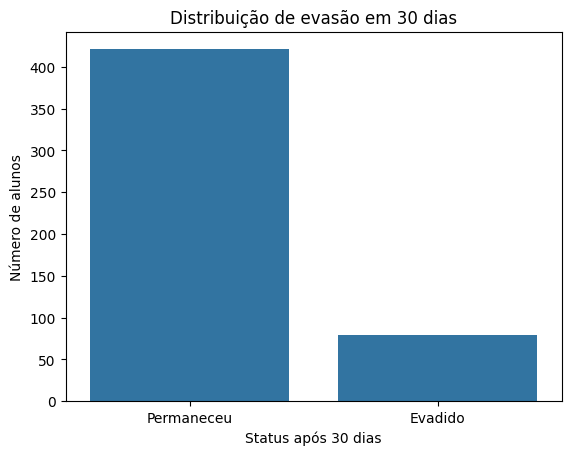

In [292]:
# Conferindo a disparidade em 'dropout_within_30_days'
# para ver se o dataset está balanceado
print(df['dropout_within_30_days'].value_counts())
print("\n")

sns.countplot(data=df, x='dropout_within_30_days')
plt.title('Distribuição de evasão em 30 dias')
plt.xticks([0, 1], ['Permaneceu', 'Evadido'])
plt.xlabel('Status após 30 dias')
plt.ylabel('Número de alunos')
plt.show()

In [293]:
# Proporções em %
print(df['dropout_within_30_days'].value_counts(normalize=True) * 100)

dropout_within_30_days
0    84.2
1    15.8
Name: proportion, dtype: float64


# Análise univariada das variáveis numéricas

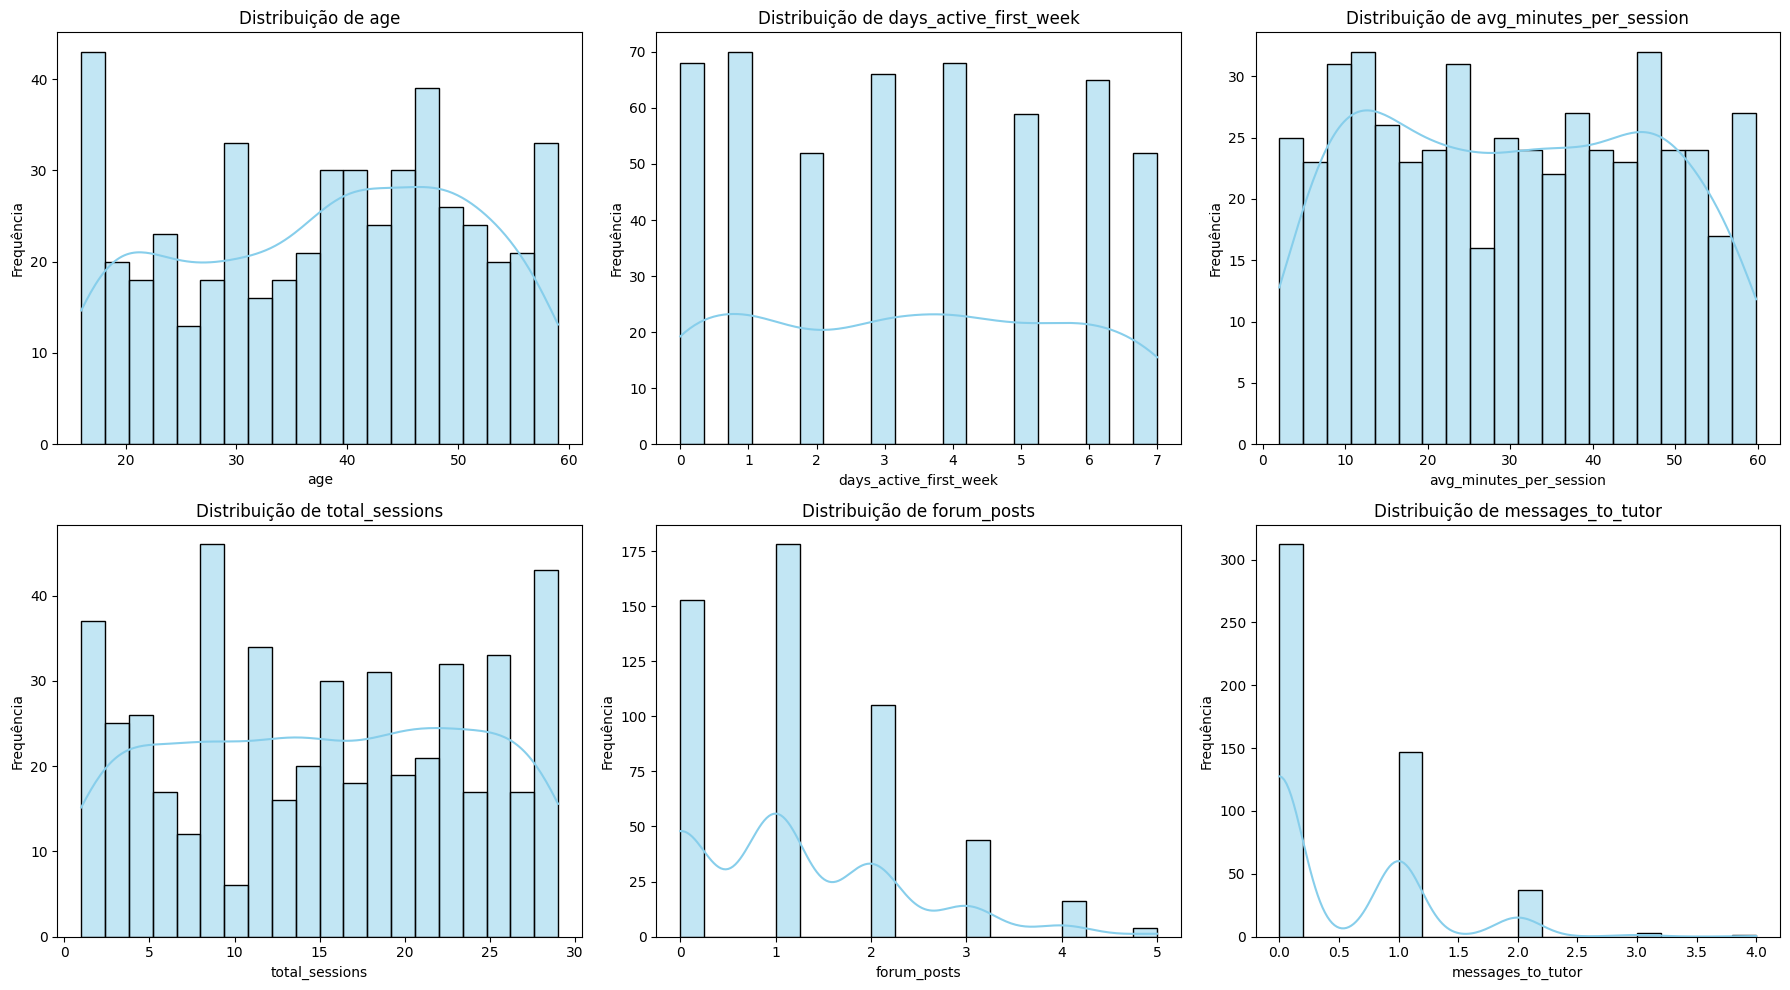

In [294]:
# Lista de variáveis numéricas
numeric_vars = [
    'age',
    'days_active_first_week',
    'avg_minutes_per_session',
    'total_sessions',
    'forum_posts',
    'messages_to_tutor'
]

# Grid de histogramas (análise univariada numérica)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axs = axs.flatten()

for i, col in enumerate(numeric_vars):
    sns.histplot(df[col], kde=True, ax=axs[i], bins=20, color='skyblue')
    axs[i].set_title(f'Distribuição de {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequência')

plt.tight_layout()
plt.show()



# Análise univariada das variáveis categóricas

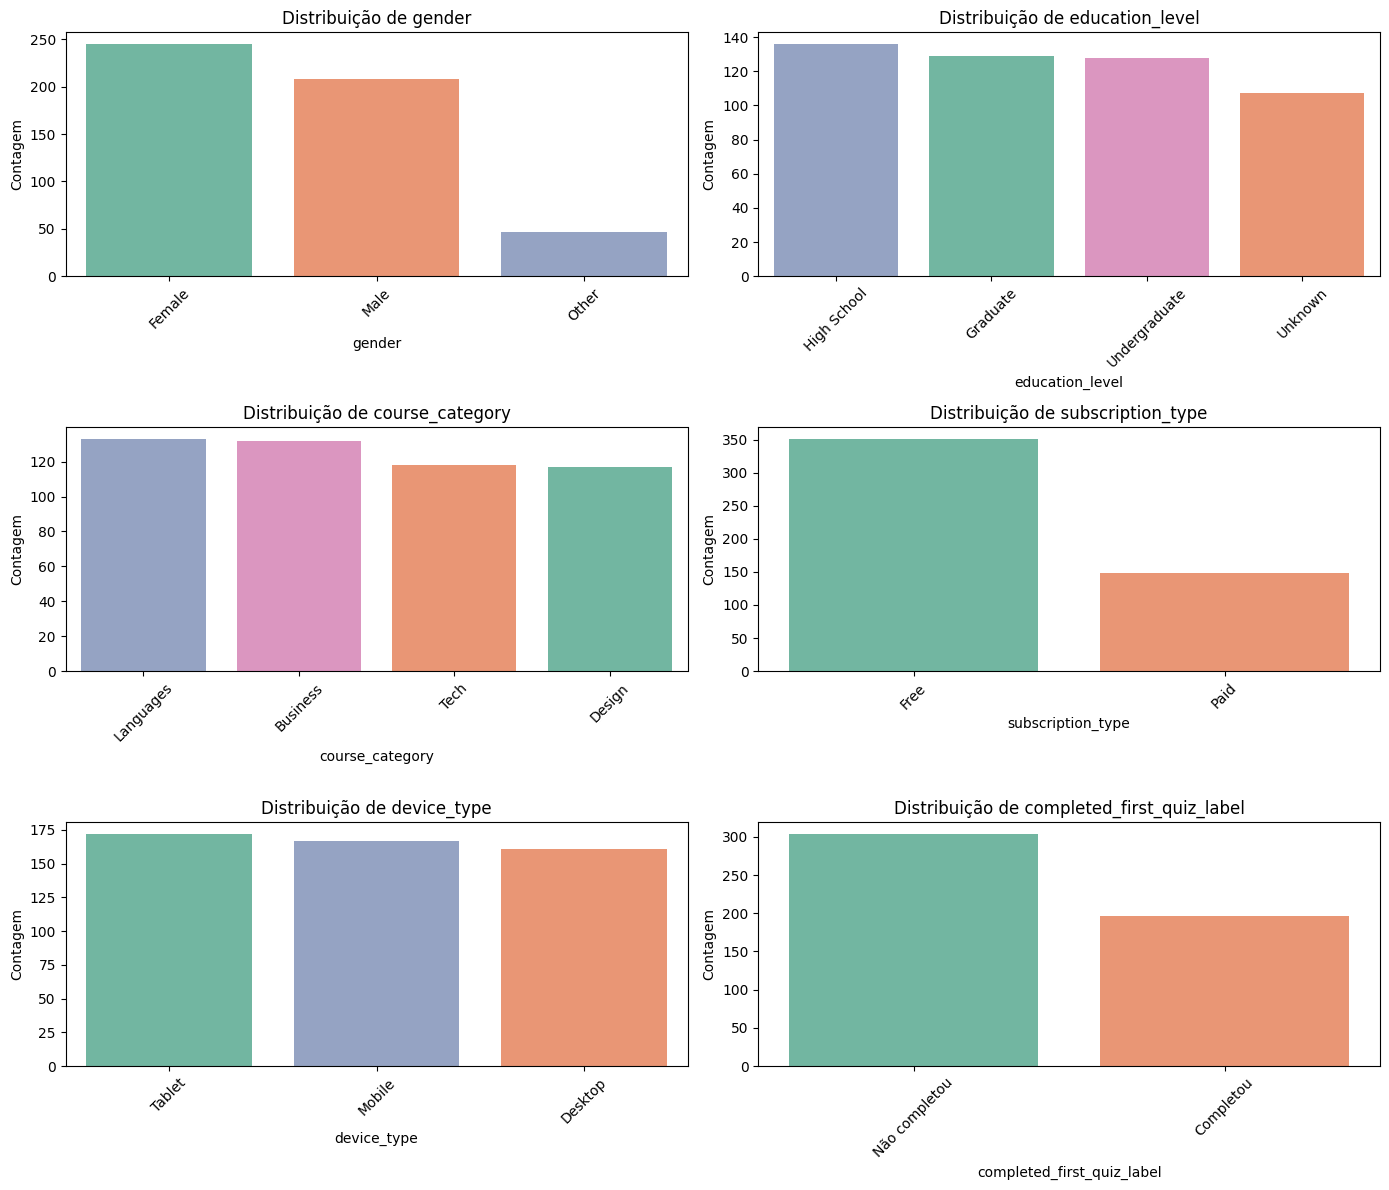

In [295]:
# Copiamos e tratamos nulos em education_level
df_cat = df.copy()
df_cat['education_level'] = df_cat['education_level'].fillna('Unknown')

# Mapeia completed_first_quiz para legendas mais amigáveis
df_cat['completed_first_quiz_label'] = df_cat['completed_first_quiz'].map({0: 'Não completou', 1: 'Completou'})

# Lista de variáveis categóricas
categorical_vars = ['gender', 'education_level', 'course_category', 'subscription_type', 'device_type', 'completed_first_quiz_label']

# Número de categorias
n = len(categorical_vars)

# Grid de gráficos de barras
fig, axs = plt.subplots(nrows=(n + 1) // 2, ncols=2, figsize=(14, 4 * ((n + 1) // 2)))
axs = axs.flatten()

for i, col in enumerate(categorical_vars):
    sns.countplot(data=df_cat, x=col, hue=col, order=df_cat[col].value_counts().index, ax=axs[i], palette='Set2', legend=False)
    axs[i].set_title(f'Distribuição de {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Contagem')
    axs[i].tick_params(axis='x', rotation=45)

# Remove gráfico extra se o número de variáveis for ímpar
if n % 2 != 0:
    fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()


# Análise bivariada das variáveis numéricas

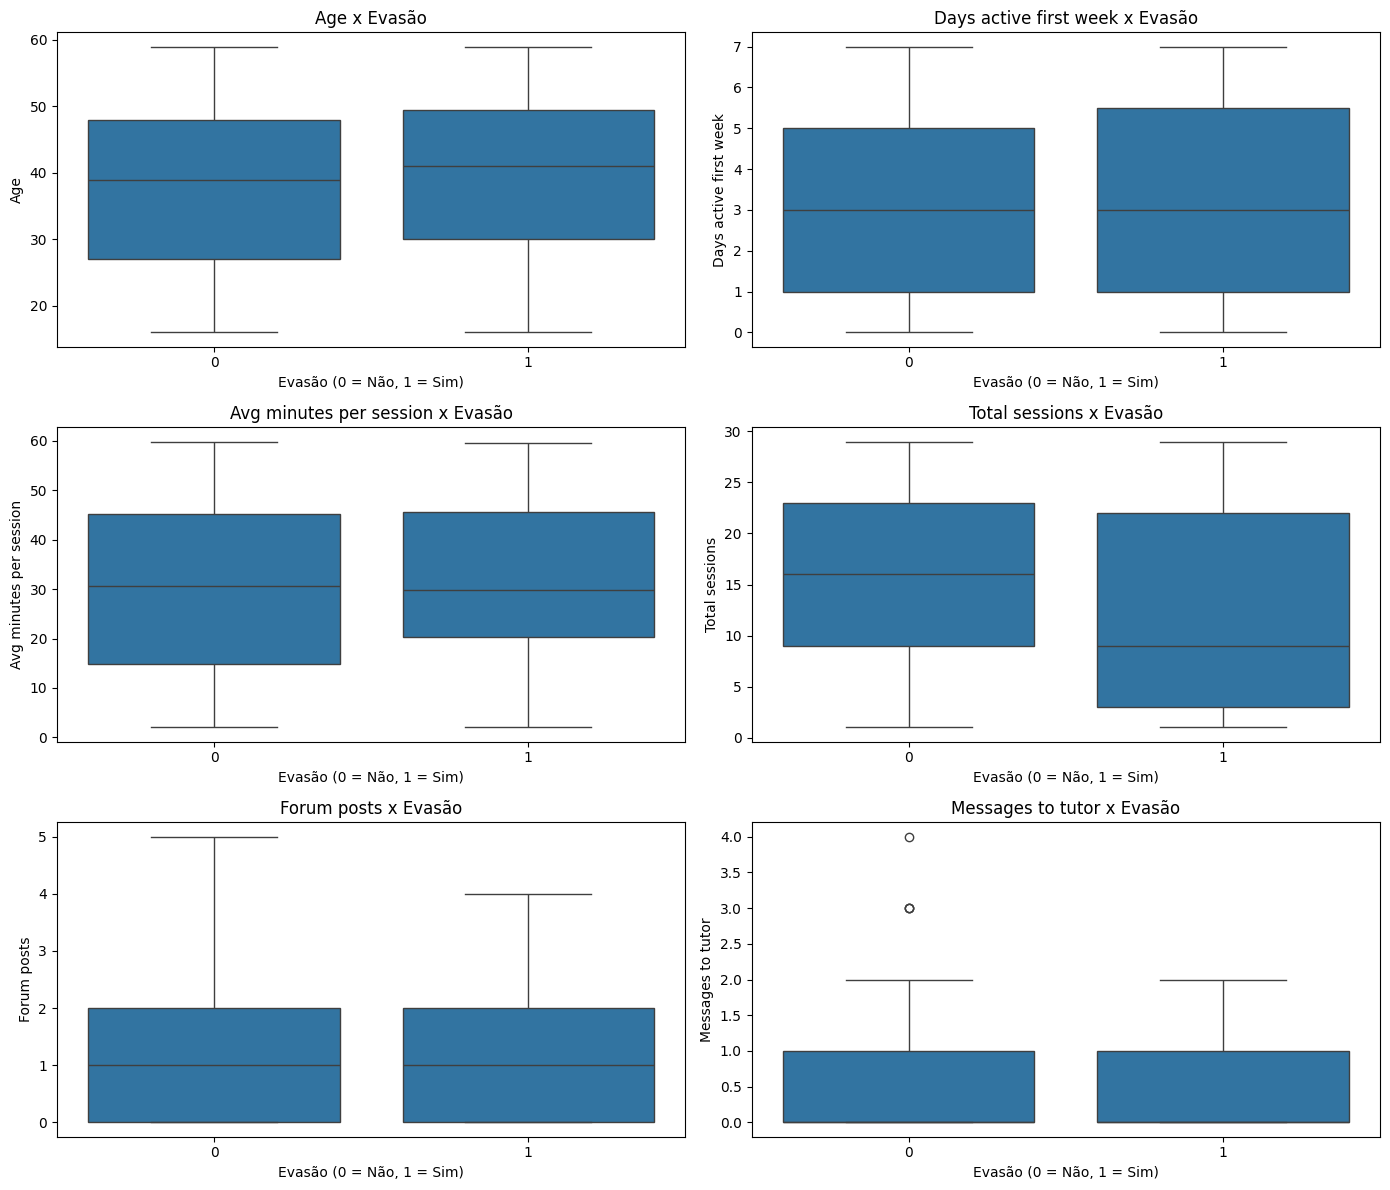

In [296]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
axs = axs.flatten()

for i, col in enumerate(numeric_vars):
    sns.boxplot(data=df, x='dropout_within_30_days', y=col, ax=axs[i])
    axs[i].set_title(f'{col.replace("_", " ").capitalize()} x Evasão')
    axs[i].set_xlabel('Evasão (0 = Não, 1 = Sim)')
    axs[i].set_ylabel(col.replace("_", " ").capitalize())

plt.tight_layout()
plt.show()

# Análise bivariada das variáveis categóricas

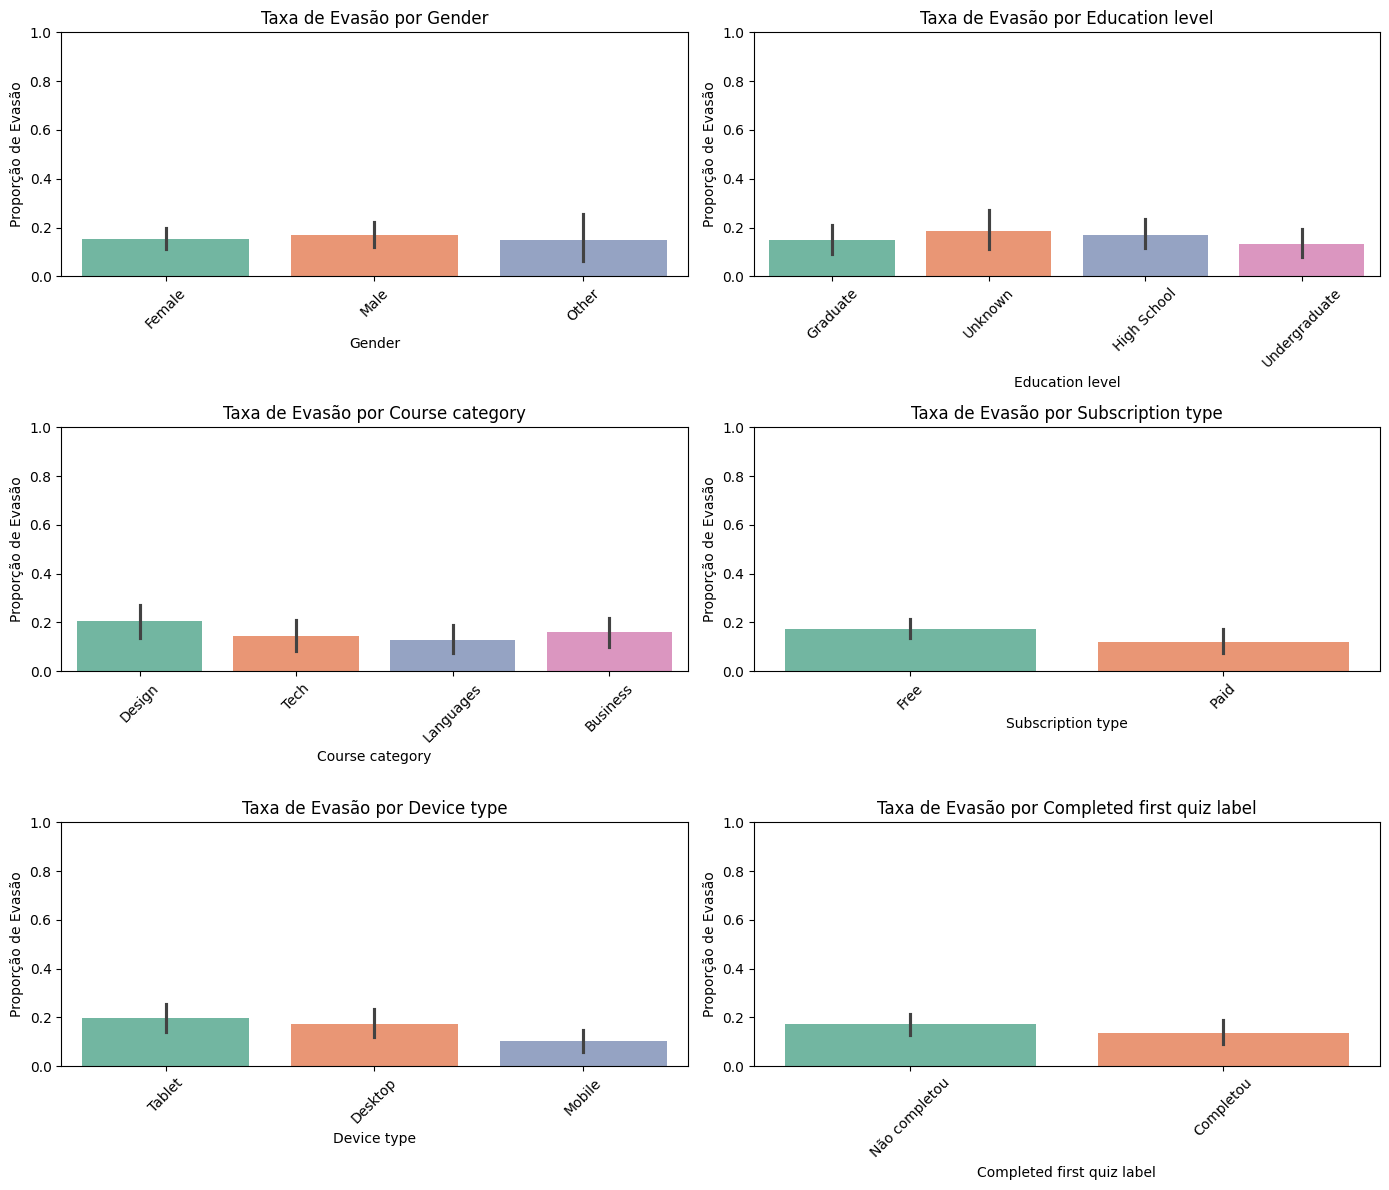

In [297]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
axs = axs.flatten()

for i, col in enumerate(categorical_vars):
    sns.barplot(data=df_cat, x=col, y='dropout_within_30_days',
            estimator=lambda x: x.mean(), hue=col, ax=axs[i], palette='Set2', legend=False)
    axs[i].set_title(f'Taxa de Evasão por {col.replace("_", " ").capitalize()}')
    axs[i].set_ylabel('Proporção de Evasão')
    axs[i].set_xlabel(col.replace("_", " ").capitalize())
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].set_ylim(0, 1)

plt.tight_layout()
plt.show()


Valores mais próximos de 1 indicam maior evasão.

# Pré-processamento dos Dados

In [298]:
# preenchendo os valores nulos da coluna education_level com "Unknown"
df['education_level'] = df['education_level'].fillna('Unknown')

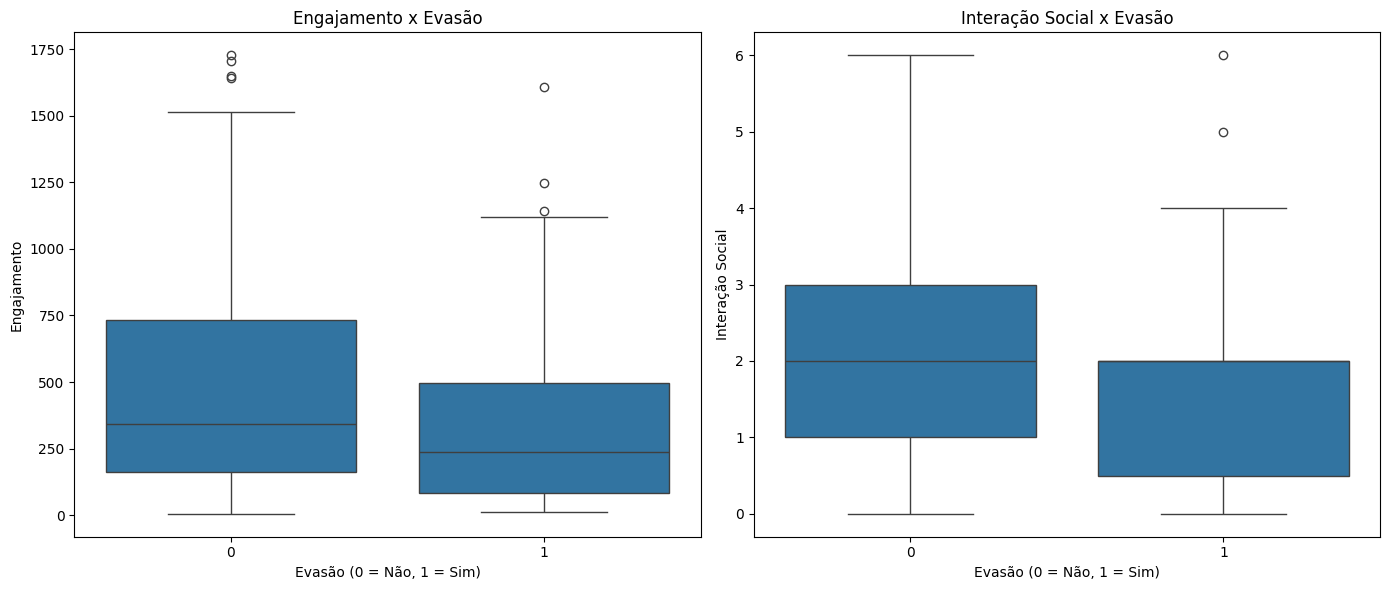

In [299]:
df_model = df.copy()

# Criando atributos derivados
df_model['engajamento'] = df_model['avg_minutes_per_session'] * df_model['total_sessions']
df_model['interacao_social'] = df_model['forum_posts'] + df_model['messages_to_tutor']

# Boxplots das novas variáveis x evasão
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sns.boxplot(data=df_model, x='dropout_within_30_days', y='engajamento', ax=axs[0])
axs[0].set_title('Engajamento x Evasão')
axs[0].set_xlabel('Evasão (0 = Não, 1 = Sim)')
axs[0].set_ylabel('Engajamento')

sns.boxplot(data=df_model, x='dropout_within_30_days', y='interacao_social', ax=axs[1])
axs[1].set_title('Interação Social x Evasão')
axs[1].set_xlabel('Evasão (0 = Não, 1 = Sim)')
axs[1].set_ylabel('Interação Social')

plt.tight_layout()
plt.show()


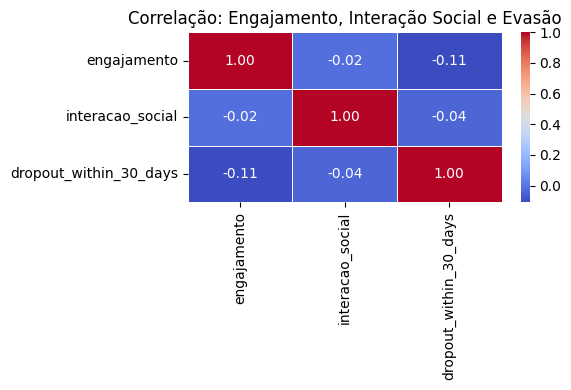

In [300]:
# Selecionar apenas as colunas de interesse
correlation_df = df_model[['engajamento', 'interacao_social', 'dropout_within_30_days']]

# Calcular a matriz de correlação
corr_matrix = correlation_df.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlação: Engajamento, Interação Social e Evasão')
plt.tight_layout()
plt.show()


In [301]:
# Verificar as novas variáveis
df_model.head()

,student_id,age,gender,education_level,course_category,days_active_first_week,avg_minutes_per_session,total_sessions,completed_first_quiz,forum_posts,messages_to_tutor,subscription_type,device_type,dropout_within_30_days,engajamento,interacao_social
0,S0000,54,Female,Graduate,Design,6,49.66,27,0,1,0,Free,Tablet,0,1340.82,1
1,S0001,44,Female,Unknown,Tech,5,2.07,23,0,1,0,Paid,Tablet,1,47.61,1
2,S0002,30,Male,Graduate,Languages,0,19.45,27,0,0,0,Free,Tablet,1,525.15,0
3,S0003,58,Other,Graduate,Business,2,58.91,5,1,1,1,Free,Tablet,0,294.55,2
4,S0004,23,Male,Graduate,Business,0,29.54,25,1,1,0,Paid,Desktop,0,738.50,1


In [302]:
# Detectando e removendo outliers
def remover_outliers_iqr(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1

  # Definindo limites para outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

  # Filtrando o dataframe
    df_filtered = df[(df[coluna] >= lower_bound) & (df[coluna] <= upper_bound)]

    return df_filtered

print("Shape antes da remoção:", df_model.shape)

# Aplicando para messages_to_tutor
df_model = remover_outliers_iqr(df_model, 'messages_to_tutor')

# Aplicando para engajamento
df_model = remover_outliers_iqr(df_model, 'engajamento')

# Aplicando para interacao_social
df_model = remover_outliers_iqr(df_model, 'interacao_social')

print("Shape depois da remoção:", df_model.shape)


Shape antes da remoção: (500, 16)
Shape depois da remoção: (454, 16)


In [303]:
# Removendo colunas irrelevantes
df_model = df_model.drop(['student_id', 'avg_minutes_per_session', 'total_sessions', 'forum_posts', 'messages_to_tutor'], axis=1)

# One-hot encoding das variáveis categóricas
df_model = pd.get_dummies(df_model, columns=['gender', 'education_level', 'course_category', 'subscription_type', 'device_type'])

# Garantindo que todos os dados sejam do tipo float
df_model = df_model.astype(float)

df_model.head()

,age,days_active_first_week,completed_first_quiz,dropout_within_30_days,engajamento,interacao_social,gender_Female,gender_Male,gender_Other,education_level_Graduate,...,education_level_Unknown,course_category_Business,course_category_Design,course_category_Languages,course_category_Tech,subscription_type_Free,subscription_type_Paid,device_type_Desktop,device_type_Mobile,device_type_Tablet
0,54.0,6.0,0.0,0.0,1340.82,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,44.0,5.0,0.0,1.0,47.61,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,30.0,0.0,0.0,1.0,525.15,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,58.0,2.0,1.0,0.0,294.55,2.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,23.0,0.0,1.0,0.0,738.50,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


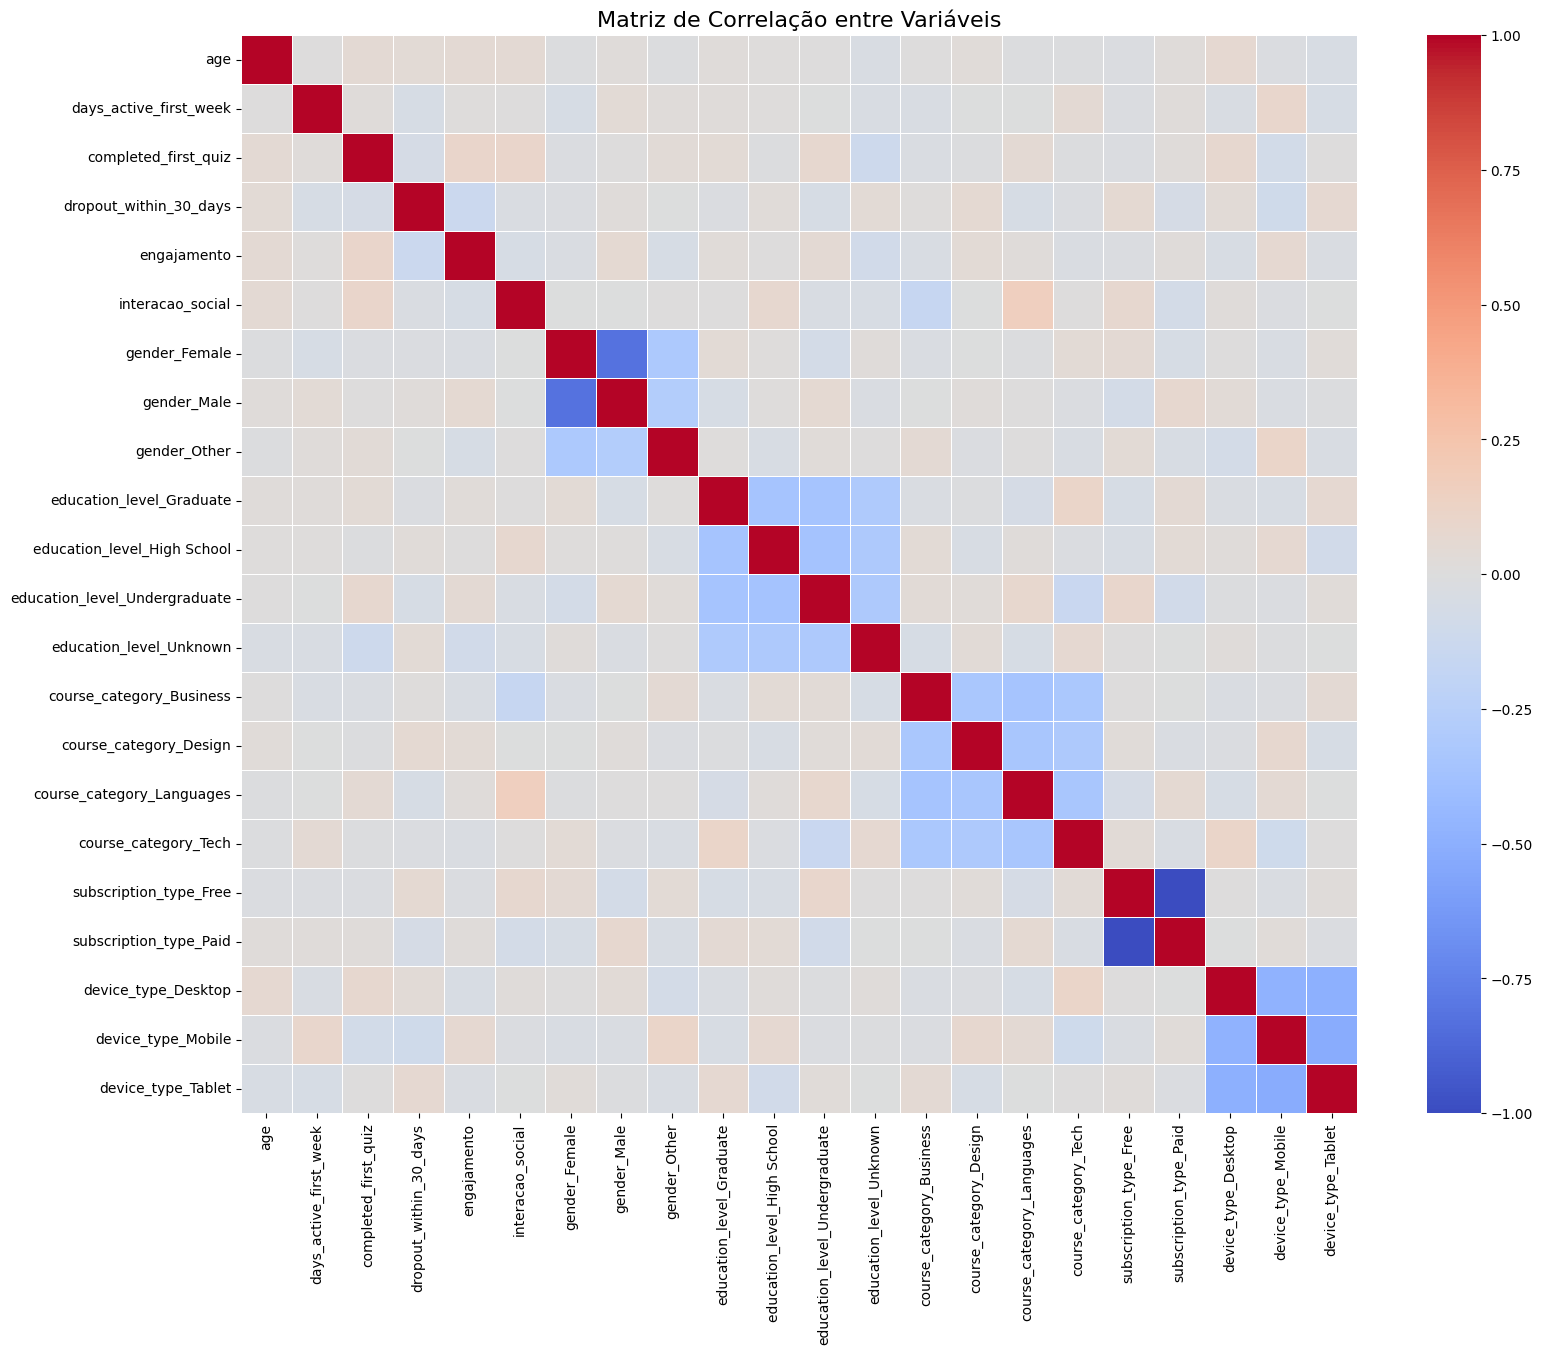

In [304]:
# Calcular a matriz de correlação
corr_matrix = df_model.corr()

# Tamanho da figura
plt.figure(figsize=(18, 14))

# Heatmap com anotações
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5, cbar=True)

# Título
plt.title('Matriz de Correlação entre Variáveis', fontsize=16)
plt.show()

In [305]:
# Correlação da variável target com as outras
target_corr = corr_matrix['dropout_within_30_days'].sort_values(ascending=False)

# Exibir
print(target_corr)

dropout_within_30_days           1.000000
device_type_Tablet               0.063550
course_category_Design           0.061575
subscription_type_Free           0.059297
age                              0.043576
education_level_Unknown          0.041984
device_type_Desktop              0.034555
education_level_High School      0.030718
gender_Male                      0.022563
course_category_Business         0.012674
gender_Other                    -0.000179
education_level_Graduate        -0.018936
course_category_Tech            -0.020240
gender_Female                   -0.022183
interacao_social                -0.029297
days_active_first_week          -0.047771
education_level_Undergraduate   -0.050207
course_category_Languages       -0.052269
subscription_type_Paid          -0.059297
completed_first_quiz            -0.061235
device_type_Mobile              -0.098252
engajamento                     -0.130604
Name: dropout_within_30_days, dtype: float64


In [306]:
# Separando df_model em treino e teste
df_model_train, df_model_test = train_test_split(
    df_model,
    test_size=0.3,
    stratify=df_model['dropout_within_30_days'],  # garante proporção da target
    random_state=42
)

# Conferindo novamente a disparidade em relação a 'dropout_within_30_days'
print(df_model_train['dropout_within_30_days'].value_counts(normalize=True) * 100)
print( '\n')
print(df_model_test['dropout_within_30_days'].value_counts(normalize=True) * 100)

dropout_within_30_days
0.0    83.596215
1.0    16.403785
Name: proportion, dtype: float64


dropout_within_30_days
0.0    83.941606
1.0    16.058394
Name: proportion, dtype: float64


In [307]:
# Separar features e target antes do SMOTE
X_train = df_model_train.drop(columns=['dropout_within_30_days'])
y_train = df_model_train['dropout_within_30_days']

# Aplicar SMOTE
smote = SMOTE(random_state=42)
train_features, train_target = smote.fit_resample(X_train, y_train)

# Verificar se ficou balanceado
print(pd.Series(train_target).value_counts())


dropout_within_30_days
0.0    265
1.0    265
Name: count, dtype: int64


In [308]:
# Separar features e target de teste
test_features = df_model_test.drop(columns=['dropout_within_30_days'])
test_target = df_model_test['dropout_within_30_days']

print(test_target.value_counts())

dropout_within_30_days
0.0    115
1.0     22
Name: count, dtype: int64


# **Parte 2: Construção do Modelo de Machine Learning**

### Treinamento com Regressão Logística

In [309]:
# K-Fold setup
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_model = None
best_score = 0
fold = 1

for train_index, val_index in kfold.split(train_features, train_target):
    # Dividir dados de treino e validação
    X_train, X_val = train_features.iloc[train_index], train_features.iloc[val_index]
    y_train, y_val = train_target.iloc[train_index], train_target.iloc[val_index]

    # Normalizar os dados com StandardScaler (aplica apenas no treino e transforma o val com os mesmos parâmetros)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Treinar o modelo com os dados normalizados
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Avaliação no conjunto de validação
    val_predictions = model.predict(X_val_scaled)
    score = accuracy_score(y_val, val_predictions)

    print(f"Fold {fold} - Acurácia: {score:.4f}")
    fold += 1

    # Armazenar o melhor modelo e scaler correspondente
    if score > best_score:
        best_score = score
        best_model = model
        best_scaler = scaler  # salvar o scaler correspondente

# Após o loop, usar o melhor modelo e o scaler para testar no conjunto de teste
test_features_scaled = best_scaler.transform(test_features)
test_predictions = best_model.predict(test_features_scaled)

# Avaliar no conjunto de teste real
print(f"\nMelhor modelo teve acurácia (validação): {best_score:.4f}")
print("\n=== Avaliação no Conjunto de Teste (Melhor Modelo) ===")
print(classification_report(test_target, test_predictions))


Fold 1 - Acurácia: 0.6132
Fold 2 - Acurácia: 0.6038
Fold 3 - Acurácia: 0.5094
Fold 4 - Acurácia: 0.5755
Fold 5 - Acurácia: 0.5283

Melhor modelo teve acurácia (validação): 0.6132

=== Avaliação no Conjunto de Teste (Melhor Modelo) ===
              precision    recall  f1-score   support

         0.0       0.85      0.62      0.71       115
         1.0       0.17      0.41      0.24        22

    accuracy                           0.58       137
   macro avg       0.51      0.51      0.48       137
weighted avg       0.74      0.58      0.64       137



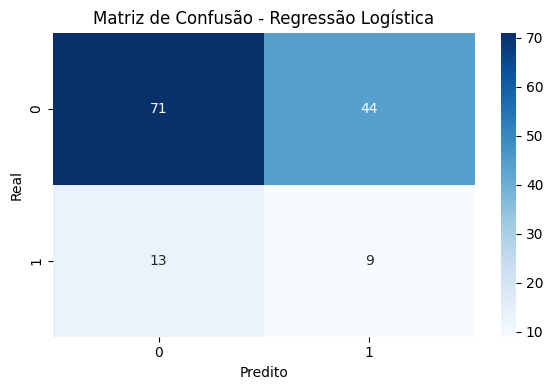

In [310]:
# Matriz de confusão
conf_matrix = confusion_matrix(test_target, test_predictions)

# Plot da matriz
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Regressão Logística")
plt.tight_layout()
plt.show()

### Treinamento com KNN

In [311]:
# K-Fold setup
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_model = None
best_score = 0
fold = 1

for train_index, val_index in kfold.split(train_features, train_target):
    # Dividir dados de treino e validação
    X_train, X_val = train_features.iloc[train_index], train_features.iloc[val_index]
    y_train, y_val = train_target.iloc[train_index], train_target.iloc[val_index]

    # Normalizar os dados com MinMaxScaler
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Treinar o modelo KNN (k=5 por padrão)
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train_scaled, y_train)

    # Avaliação no conjunto de validação
    val_predictions = model.predict(X_val_scaled)
    score = accuracy_score(y_val, val_predictions)

    print(f"Fold {fold} - Acurácia: {score:.4f}")
    fold += 1

    # Armazenar o melhor modelo e scaler correspondente
    if score > best_score:
        best_score = score
        best_model = model
        best_scaler = scaler

# Testar no conjunto de teste com o melhor modelo e scaler
test_features_scaled = best_scaler.transform(test_features)
test_predictions = best_model.predict(test_features_scaled)

# Avaliação final
print(f"\nMelhor modelo teve acurácia (validação): {best_score:.4f}")
print("\n=== Avaliação no Conjunto de Teste (Melhor Modelo - KNN) ===")
print(classification_report(test_target, test_predictions))

Fold 1 - Acurácia: 0.6981
Fold 2 - Acurácia: 0.7547
Fold 3 - Acurácia: 0.7358
Fold 4 - Acurácia: 0.6981
Fold 5 - Acurácia: 0.6981

Melhor modelo teve acurácia (validação): 0.7547

=== Avaliação no Conjunto de Teste (Melhor Modelo - KNN) ===
              precision    recall  f1-score   support

         0.0       0.88      0.50      0.63       115
         1.0       0.19      0.64      0.30        22

    accuracy                           0.52       137
   macro avg       0.54      0.57      0.47       137
weighted avg       0.77      0.52      0.58       137



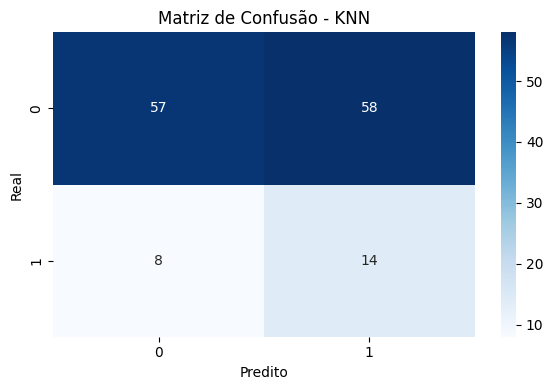

In [312]:
# Matriz de confusão
conf_matrix = confusion_matrix(test_target, test_predictions)

# Plot da matriz
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - KNN")
plt.tight_layout()
plt.show()

### Treinamento com Árvore de Decisão

In [313]:
# K-Fold setup
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_model = None
best_score = 0
fold = 1

for train_index, val_index in kfold.split(train_features, train_target):
    # Dividir dados de treino e validação
    X_train, X_val = train_features.iloc[train_index], train_features.iloc[val_index]
    y_train, y_val = train_target.iloc[train_index], train_target.iloc[val_index]

    # Treinar o modelo (sem normalização)
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Avaliação no conjunto de validação
    val_predictions = model.predict(X_val)
    score = accuracy_score(y_val, val_predictions)

    print(f"Fold {fold} - Acurácia: {score:.4f}")
    fold += 1

    # Armazenar o melhor modelo
    if score > best_score:
        best_score = score
        best_model = model

# Após o loop, avaliar no conjunto de teste
test_predictions = best_model.predict(test_features)

# Avaliação final
print(f"\nMelhor modelo teve acurácia (validação): {best_score:.4f}")
print("\n=== Avaliação no Conjunto de Teste (Melhor Modelo) ===")
print(classification_report(test_target, test_predictions))

Fold 1 - Acurácia: 0.8019
Fold 2 - Acurácia: 0.8396
Fold 3 - Acurácia: 0.7830
Fold 4 - Acurácia: 0.8113
Fold 5 - Acurácia: 0.7925

Melhor modelo teve acurácia (validação): 0.8396

=== Avaliação no Conjunto de Teste (Melhor Modelo) ===
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       115
         1.0       0.16      0.14      0.15        22

    accuracy                           0.74       137
   macro avg       0.50      0.50      0.50       137
weighted avg       0.73      0.74      0.74       137



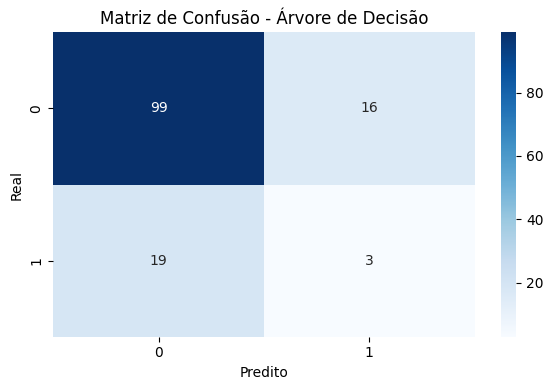

In [314]:
# Matriz de confusão
conf_matrix = confusion_matrix(test_target, test_predictions)

# Plot da matriz
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Árvore de Decisão")
plt.tight_layout()
plt.show()

### Treinamento com Random Forest

In [315]:
# K-Fold setup
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_model = None
best_score = 0
fold = 1

for train_index, val_index in kfold.split(train_features, train_target):
    # Dividir dados de treino e validação
    X_train, X_val = train_features.iloc[train_index], train_features.iloc[val_index]
    y_train, y_val = train_target.iloc[train_index], train_target.iloc[val_index]

    # Treinar o modelo Random Forest
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Avaliação no conjunto de validação
    val_predictions = model.predict(X_val)
    score = accuracy_score(y_val, val_predictions)

    print(f"Fold {fold} - Acurácia: {score:.4f}")
    fold += 1

    # Armazenar o melhor modelo
    if score > best_score:
        best_score = score
        best_model = model

# Após o loop, avaliar no conjunto de teste
test_predictions = best_model.predict(test_features)

# Avaliação final
print(f"\nMelhor modelo teve acurácia (validação): {best_score:.4f}")
print("\n=== Avaliação no Conjunto de Teste (Melhor Modelo) ===")
print(classification_report(test_target, test_predictions))

Fold 1 - Acurácia: 0.9057
Fold 2 - Acurácia: 0.8491
Fold 3 - Acurácia: 0.9434
Fold 4 - Acurácia: 0.8585
Fold 5 - Acurácia: 0.9340

Melhor modelo teve acurácia (validação): 0.9434

=== Avaliação no Conjunto de Teste (Melhor Modelo) ===
              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91       115
         1.0       0.50      0.05      0.08        22

    accuracy                           0.84       137
   macro avg       0.67      0.52      0.50       137
weighted avg       0.79      0.84      0.78       137



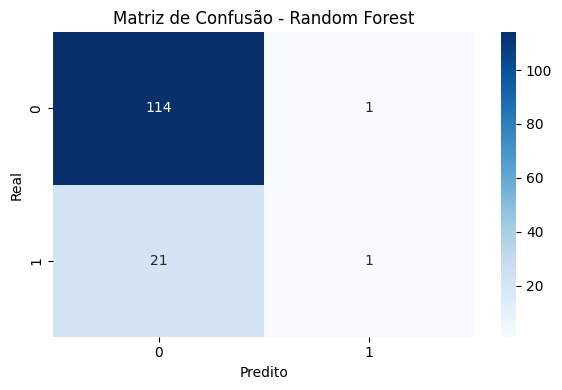

In [316]:
# Matriz de confusão
conf_matrix = confusion_matrix(test_target, test_predictions)

# Plot da matriz
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Random Forest")
plt.tight_layout()
plt.show()

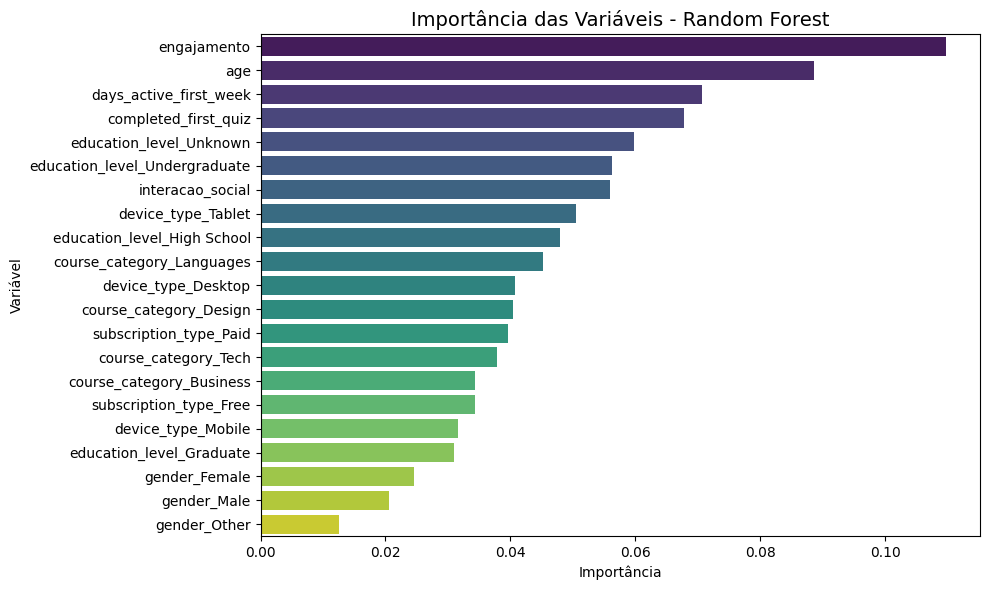

In [317]:
# Obter importância das features
importances = best_model.feature_importances_
feature_names = test_features.columns

# Criar DataFrame para melhor visualização
feat_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotar gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_importances_df, x='Importance', y='Feature', hue='Feature', palette='viridis', legend=False)
plt.title('Importância das Variáveis - Random Forest', fontsize=14)
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()


### Treinamento com XGBoost

In [318]:
# K-Fold setup
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_model = None
best_score = 0
fold = 1

for train_index, val_index in kfold.split(train_features, train_target):
    # Dividir dados de treino e validação
    X_train, X_val = train_features.iloc[train_index], train_features.iloc[val_index]
    y_train, y_val = train_target.iloc[train_index], train_target.iloc[val_index]

    # Treinar o modelo XGBoost
    model = XGBClassifier(
        n_estimators=100,
        eval_metric='logloss',
        random_state=42
    )
    model.fit(X_train, y_train)

    # Avaliação no conjunto de validação
    val_predictions = model.predict(X_val)
    score = accuracy_score(y_val, val_predictions)

    print(f"Fold {fold} - Acurácia: {score:.4f}")
    fold += 1

    # Armazenar o melhor modelo
    if score > best_score:
        best_score = score
        best_model = model

# Após o loop, avaliar no conjunto de teste
test_predictions = best_model.predict(test_features)

# Avaliação final
print(f"\nMelhor modelo teve acurácia (validação): {best_score:.4f}")
print("\n=== Avaliação no Conjunto de Teste (Melhor Modelo - XGBoost) ===")
print(classification_report(test_target, test_predictions))

Fold 1 - Acurácia: 0.8585
Fold 2 - Acurácia: 0.8491
Fold 3 - Acurácia: 0.9151
Fold 4 - Acurácia: 0.8302
Fold 5 - Acurácia: 0.9151

Melhor modelo teve acurácia (validação): 0.9151

=== Avaliação no Conjunto de Teste (Melhor Modelo - XGBoost) ===
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.90       115
         1.0       0.33      0.09      0.14        22

    accuracy                           0.82       137
   macro avg       0.59      0.53      0.52       137
weighted avg       0.76      0.82      0.78       137



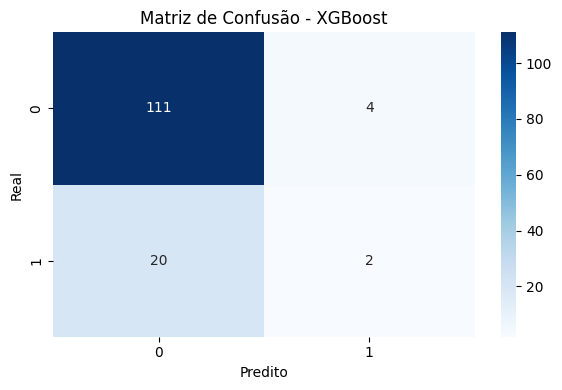

In [319]:
# Matriz de confusão
conf_matrix = confusion_matrix(test_target, test_predictions)

# Plot da matriz
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - XGBoost")
plt.tight_layout()
plt.show()

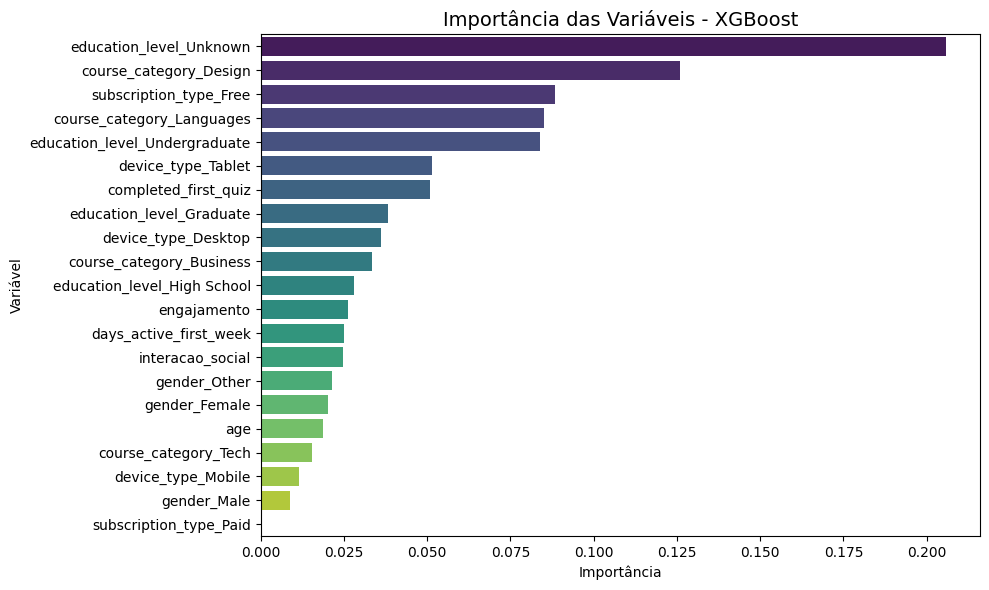

In [320]:
# Obter importância das features
importances = best_model.feature_importances_
feature_names = test_features.columns

# Criar DataFrame para melhor visualização
feat_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotar gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_importances_df, x='Importance', y='Feature', hue='Feature', palette='viridis', legend=False)
plt.title('Importância das Variáveis - XGBoost', fontsize=14)
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()
